In [65]:
# Hacer Mapa que indique modelo mas vendido, y precio promedio de los vehiculos por estado
import pandas as pd
import folium

df_clean = pd.read_csv('c://users//Sergi//vehicles_with_model_clean.csv')

# Calcular la latitud y longitud promedio por estado
state_lat_long = df_clean.groupby('state').agg({'lat': 'mean', 'long': 'mean'}).reset_index()

# Agrupar los datos por estado y calcular el precio promedio, el fabricante y el modelo más comunes
state_data = df_clean.groupby('state').agg({'price': 'mean', 'manufacturer': lambda x: x.value_counts().idxmax(), 'model': lambda x: x.value_counts().idxmax()}).reset_index()

# Combinar los datos de latitud y longitud con los datos agregados por estado
state_data = pd.merge(state_data, state_lat_long, on='state')

# Crear un mapa de los Estados Unidos
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Agregar información al mapa
for index, row in state_data.iterrows():
    state_info = "Price Promedio: ${:,.2f}\nFabricante más vendido: {}\nModelo más vendido: {}".format(row['price'], row['manufacturer'], row['model'])
    folium.Marker(location=[row['lat'], row['long']], popup=folium.Popup(state_info, max_width=150, parse_html=True)).add_to(us_map)

# Guardar el mapa como un archivo HTML
us_map.save("C://Users//sergi//Proyectos//Proyecto_Final//data//mapas//us_map.html")

In [66]:
# Hacer mapa de calor que indique donde se venden mas autos

from folium import plugins

# Crear un mapa centrado en una ubicación inicial
map_heat = folium.Map(location=[df_clean['lat'].mean(), df_clean['long'].mean()], zoom_start=4)

# Crear una lista de tuplas (latitud, longitud)
locations = list(zip(df_clean['lat'], df_clean['long']))

# Agregar el mapa de calor al mapa
folium.plugins.HeatMap(locations, radius=10, blur=5).add_to(map_heat)

# Guardar el mapa como un archivo HTML
map_heat.save("C://Users//sergi//Proyectos//Proyecto_Final//data//mapas//heat_map.html")

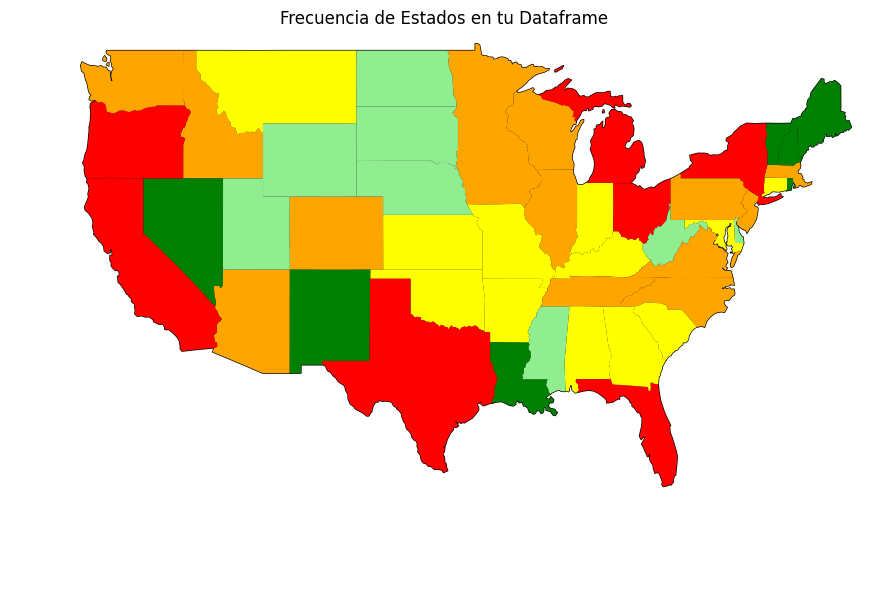

In [67]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga el mapa de los Estados Unidos
estados_us = gpd.read_file('C:/Users/sergi/Proyectos/Proyecto_Final/data/mapas/us-states.json')

# Convierte el estado a minúsculas en tu dataframe
df_clean['state'] = df_clean['state'].str.lower()

# Crea una tabla auxiliar para contar las frecuencias
estados_frecuencia = df_clean['state'].value_counts().reset_index(name='frecuencia')

# Une la tabla de frecuencia al dataframe original
df_clean = df_clean.merge(estados_frecuencia, on='state')

# Define una función para clasificar los estados por frecuencia
def clasificar_estado(frecuencia):
    if frecuencia <= 1000:
        return 'Baja'
    elif frecuencia <= 2500:
        return 'Media-Baja'
    elif frecuencia <= 5000:
        return 'Media'
    elif frecuencia <= 10000:
        return 'Media-Alta'
    else:
        return 'Alta'

# Agrega la columna de clasificación al dataframe
df_clean['clasificacion'] = df_clean['frecuencia'].apply(clasificar_estado)

# Crea la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Dibuja el mapa con colores según la clasificación
estados_us.plot(ax=ax, color='lightgrey', edgecolor='black')
for idx, row in estados_us.iterrows():
    estado_id = row['id'].lower()  # Convertir ID a minúsculas
    if estado_id in df_clean['state'].tolist():
        clasificacion = df_clean.loc[df_clean['state'] == estado_id, 'clasificacion'].iloc[0]
        color = {
            'Baja': 'lightgreen',
            'Media-Baja': 'green',
            'Media': 'yellow',
            'Media-Alta': 'orange',
            'Alta': 'red'
        }[clasificacion]
        estados_us[estados_us['id'] == row['id']].plot(ax=ax, color=color)

# Agrega un título y leyenda
ax.set_title('Frecuencia de Estados en tu Dataframe')
ax.set_axis_off()
# Limita el largo del eje x
ax.set_xlim([-130, -65])
# Limita la altura del eje y
ax.set_ylim([20, 50]) 
plt.tight_layout()
plt.show()
